# 1. Read in Training Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
train_data = pd.read_csv("./raw_data/data_train.csv")

In [6]:
train_data.shape #(12,229,978, 71)
train_data.head()

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,customer_spend_03,customer_merchant_02,customer_merchant_01,customer_spend_04,customer_spend_05,customer_spend_06,customer_spend_07,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_profile_01,customer_merchant_03,customer_profile_01,customer_profile_02,customer_digital_activity_05,customer_spend_13,customer_digital_activity_06,customer_spend_14,customer_digital_activity_07,customer_digital_activity_08,customer_digital_activity_09,customer_digital_activity_10,customer_digital_activity_11,customer_digital_activity_12,customer_digital_activity_13,customer_digital_activity_14,customer_digital_activity_15,customer_spend_15,customer_digital_activity_16,customer_spend_16,customer_spend_17,customer_digital_activity_17,customer_digital_activity_03,merchant_spend_11,customer_digital_activity_18,customer_digital_activity_19,distance_01,customer_digital_activity_20,distance_02,distance_03,customer_spend_18,customer_spend_19,customer_digital_activity_21,customer_digital_activity_22,distance_04,merchant_profile_02,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
0,0,0,NaN,107.215862,26.686594,74.0,3682.75,138.0,111.0,14.0,133.0,NaN,NaN,4477.0,29719.09,782.0,306.0,29.781042,43.0,0.0,0.0,0.0,32.0,1429.49,48.0,101.0,0.905510,5466.06,1700.00,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,10.0,0.307692,0.444444,1.219756,13.0,0.714531,20.85,0.017921,0.000468,4.000000,0.157534,49466.0,65923.0,0.000000,29.180,58.434969,32.500000,86.0,15.856826,168972,152285
1,0,0,NaN,35.552000,50.928261,3.0,1171.35,23.0,17.0,2.0,8.0,NaN,NaN,17577.0,1051.40,52.0,43.0,34.643313,97.0,0.0,0.0,0.0,15.0,5646.86,163.0,403.0,0.961583,781.56,597.41,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,3.808333,NaN,6.998555,1.0,0.871597,24.81,NaN,NaN,3.808333,0.084416,3638.0,7801.0,0.419355,28.465,5.392089,7.000000,125.0,6.998555,212404,39032
2,0,0,NaN,31.623103,48.837872,19.0,2295.38,47.0,42.0,11.0,62.0,NaN,NaN,49494.0,4695.22,196.0,136.0,1731.000000,2.0,1731.0,2.0,2.0,8.0,3462.00,2.0,406.0,0.327672,1457.84,1200.00,NaN,1.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.129853,13.5,0.076536,32.26,0.000000,0.000000,NaN,0.240000,3912.0,12868.0,0.836364,421.500,33.780445,0.000000,180.0,1.753009,225178,7439
3,0,0,NaN,112.277391,NaN,NaN,NaN,NaN,NaN,16.0,33.0,NaN,NaN,NaN,5190.94,167.0,112.0,54.800000,4.0,0.0,0.0,0.0,62.0,274.00,5.0,326.0,0.769936,351.22,500.00,1.0,NaN,4.0,NaN,NaN,NaN,NaN,20.0,19.0,19.0,13.0,19.0,7.0,NaN,3.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.000000,0.187500,28919.0,23553.0,0.952381,50.000,37.340085,28.666667,134.0,9.000063,183948,485069
4,1,0,NaN,448.427273,NaN,NaN,NaN,NaN,NaN,5.0,8.0,NaN,NaN,NaN,11713.96,33.0,28.0,166.000000,1.0,0.0,0.0,0.0,74.0,166.00,1.0,326.0,NaN,831.67,99.00,1.0,NaN,2.0,NaN,NaN,NaN,NaN,15.0,15.0,15.0,7.0,15.0,4.0,NaN,3.0,NaN,NaN,10.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,6.500000,0.428571,1086.0,308.0,0.754386,69.509,77.794164,15.000000,114.0,1.767939,210107,536004


In [7]:
feature_dictionary = pd.read_csv("./raw_data/feature_dictionary_reordered.csv")

In [8]:
feature_dictionary.head()

,Feature Name,Feature description,Feature Type
0,customer,Customer ID,numeric
1,merchant,Merchant ID,numeric
2,ind_recommended,Indicator Recommended. 1 means Merchant was re...,numeric
3,activation,Activation Indicator (Dependent Variable),numeric
4,customer_profile_01,Customer_Profile_variable_01,numeric


In [18]:
# Reordered dataframe: by column names (DEPRECATED)
cm_profile = train_data.filter(like="customer_profile").sort_index(axis=1)
cm_spend = train_data.filter(like="customer_spend").sort_index(axis=1)
cm_industry_spend = train_data.filter(like="customer_industry_spend").sort_index(axis=1)
cm_digital_activity = train_data.filter(like="customer_digital_activity").sort_index(axis=1)
cm_mr = train_data.filter(like="customer_merchant").sort_index(axis=1)
distance = train_data.filter(like="distance").sort_index(axis=1)
mr_profile = train_data.filter(like="merchant_profile").sort_index(axis=1) #merchant_profile_01 is a categorical variable
mr_spend = train_data.filter(like="merchant_spend").sort_index(axis=1)
ids_labels = train_data[["customer", "merchant", "ind_recommended", "activation"]]
train_data = pd.concat([ids_labels, cm_profile, cm_spend, cm_industry_spend, cm_digital_activity, cm_mr, distance, mr_profile, mr_spend], axis=1)

In [9]:
# Sort training data
feature_names = feature_dictionary["Feature Name"].values
train_data = train_data[feature_names]

In [10]:
train_data.head()

,customer,merchant,ind_recommended,activation,customer_profile_01,customer_profile_02,customer_profile_03,customer_profile_04,customer_spend_01,customer_spend_02,customer_spend_03,customer_spend_04,customer_spend_05,customer_spend_06,customer_spend_07,customer_spend_13,customer_spend_14,customer_spend_15,customer_spend_16,customer_spend_17,customer_spend_18,customer_spend_19,customer_digital_activity_01,customer_digital_activity_02,customer_digital_activity_03,customer_digital_activity_04,customer_digital_activity_05,customer_digital_activity_06,customer_digital_activity_07,customer_digital_activity_08,customer_digital_activity_09,customer_digital_activity_10,customer_digital_activity_11,customer_digital_activity_12,customer_digital_activity_13,customer_digital_activity_14,customer_digital_activity_15,customer_digital_activity_16,customer_digital_activity_17,customer_digital_activity_18,customer_digital_activity_19,customer_digital_activity_20,customer_digital_activity_21,customer_digital_activity_22,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_merchant_01,customer_merchant_02,customer_merchant_03,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10,merchant_spend_11
0,168972,152285,0,0,5466.06,1700.00,58.434969,86.0,107.215862,14.0,133.0,4477.0,29719.09,782.0,306.0,3.0,4.0,NaN,1.0,NaN,0.714531,20.85,0.000000,32.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.444444,0.017921,0.000468,26.686594,74.0,3682.75,138.0,111.0,NaN,NaN,0.905510,0.307692,1.219756,13.0,4.000000,15.856826,101.0,0.157534,65923.0,29.781042,43.0,0.0,0.0,0.0,32.0,1429.49,48.0,49466.0,29.180,NaN
1,212404,39032,0,0,781.56,597.41,5.392089,125.0,35.552000,2.0,8.0,17577.0,1051.40,52.0,43.0,1.0,2.0,NaN,1.0,NaN,0.871597,24.81,0.419355,7.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.928261,3.0,1171.35,23.0,17.0,NaN,NaN,0.961583,3.808333,6.998555,1.0,3.808333,6.998555,403.0,0.084416,7801.0,34.643313,97.0,0.0,0.0,0.0,15.0,5646.86,163.0,3638.0,28.465,NaN
2,225178,7439,0,0,1457.84,1200.00,33.780445,180.0,31.623103,11.0,62.0,49494.0,4695.22,196.0,136.0,1.0,24.0,2.0,2.0,3.0,0.076536,32.26,0.836364,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,48.837872,19.0,2295.38,47.0,42.0,NaN,NaN,0.327672,NaN,0.129853,13.5,NaN,1.753009,406.0,0.240000,12868.0,1731.000000,2.0,1731.0,2.0,2.0,8.0,3462.00,2.0,3912.0,421.500,NaN
3,183948,485069,0,0,351.22,500.00,37.340085,134.0,112.277391,16.0,33.0,NaN,5190.94,167.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.952381,28.666667,0.0,NaN,1.0,4.0,NaN,NaN,NaN,20.0,19.0,19.0,13.0,19.0,7.0,3.0,0.0,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.769936,NaN,NaN,NaN,2.000000,9.000063,326.0,0.187500,23553.0,54.800000,4.0,0.0,0.0,0.0,62.0,274.00,5.0,28919.0,50.000,NaN
4,210107,536004,1,0,831.67,99.00,77.794164,114.0,448.427273,5.0,8.0,NaN,11713.96,33.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754386,15.000000,0.0,NaN,1.0,2.0,NaN,NaN,NaN,15.0,15.0,15.0,7.0,15.0,4.0,3.0,10.0,NaN,1.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,1.767939,326.0,0.428571,308.0,166.000000,1.0,0.0,0.0,0.0,74.0,166.00,1.0,1086.0,69.509,NaN


# 2. Manual Analysis (Before NaN Filtering)

In [8]:
# Reordered dataframe: by customer id
train_data_cmid = train_data.sort_values(by=["customer"])

# Reordered dataframe: by merchant id
train_data_mrid = train_data.sort_values(by=["merchant"])

In [49]:
train_data_cmid.head(60)

,customer,merchant,ind_recommended,activation,customer_profile_01,customer_profile_02,customer_profile_03,customer_profile_04,customer_spend_01,customer_spend_02,customer_spend_03,customer_spend_04,customer_spend_05,customer_spend_06,customer_spend_07,customer_spend_13,customer_spend_14,customer_spend_15,customer_spend_16,customer_spend_17,customer_spend_18,customer_spend_19,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_digital_activity_01,customer_digital_activity_02,customer_digital_activity_03,customer_digital_activity_04,customer_digital_activity_05,customer_digital_activity_06,customer_digital_activity_07,customer_digital_activity_08,customer_digital_activity_09,customer_digital_activity_10,customer_digital_activity_11,customer_digital_activity_12,customer_digital_activity_13,customer_digital_activity_14,customer_digital_activity_15,customer_digital_activity_16,customer_digital_activity_17,customer_digital_activity_18,customer_digital_activity_19,customer_digital_activity_20,customer_digital_activity_21,customer_digital_activity_22,customer_merchant_01,customer_merchant_02,customer_merchant_03,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10,merchant_spend_11
4011268,0,437672,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,33.0,1.0,1.0,4.0,0.471619,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.987552,0.015306,0.004752,NaN,NaN,0.915199,1.000000,0.081735,1.0,1.000000,0.081735,101.0,0.389223,5809.0,83.857933,564.0,0.000000,0.0,0.0,2.0,54759.23,653.0,7789.0,73.640000,NaN
11762549,0,537916,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,16.0,1.0,1.0,4.0,0.339132,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.069869,0.005304,0.000595,NaN,NaN,0.890552,1.000000,0.128216,1.0,1.000000,0.128216,101.0,0.559633,664.0,118.280882,671.0,0.000000,0.0,0.0,1.0,100538.75,850.0,3767.0,102.408519,NaN
5616754,0,294393,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,16.0,1.0,1.0,4.0,0.887291,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,0.842447,5.687500,0.181966,1.0,5.687500,0.181966,101.0,0.351039,9282.0,74.936134,173.0,0.000000,0.0,0.0,10.0,17834.80,238.0,28229.0,39.141591,NaN
2620353,0,552762,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,19.0,1.0,1.0,4.0,1.057874,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.490000,0.037172,0.001231,NaN,NaN,0.883222,1.000000,0.191539,1.0,1.000000,0.191539,101.0,0.336029,10985.0,40.419133,256.0,22.948633,135.0,166.0,9.0,12125.74,300.0,40152.0,32.830000,NaN
12224583,0,525036,0,1,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,43.0,1.0,1.0,4.0,1.251532,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,0.911327,2.104167,0.091027,1.0,2.104167,0.091027,101.0,0.274652,22887.0,43.363227,481.0,17.202818,231.0,369.0,4.0,28619.73,660.0,53400.0,27.750000,NaN
5193924,0,490615,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,NaN,1.0,1.0,4.0,0.742947,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN

In [51]:
train_data_mrid.drop(train_data_mrid.iloc[:, 4:52], axis=1).head(40)

,customer,merchant,ind_recommended,activation,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10,merchant_spend_11
244947,53344,0,0,0,NaN,2.865887,1.0,NaN,2.865887,101.0,NaN,NaN,117.865342,62.0,0.0,0.0,0.0,13.0,8604.17,73.0,NaN,NaN,NaN
8192800,434018,0,0,0,NaN,0.503180,4.0,NaN,2.012719,101.0,NaN,NaN,121.203333,63.0,0.0,0.0,0.0,11.0,9090.25,75.0,NaN,NaN,NaN
6377565,74103,0,0,0,NaN,NaN,NaN,NaN,4.526856,101.0,NaN,NaN,118.339718,60.0,0.0,0.0,0.0,13.0,8402.12,71.0,NaN,NaN,NaN
9542236,208282,0,0,0,NaN,2.012719,1.0,NaN,2.012719,101.0,NaN,NaN,105.593472,58.0,0.0,0.0,0.0,13.0,7602.73,72.0,NaN,NaN,NaN
11251501,96378,0,0,0,NaN,2.012719,1.0,NaN,2.012719,101.0,NaN,NaN,106.537971,54.0,0.0,0.0,0.0,13.0,7351.12,69.0,NaN,NaN,NaN
11323755,1005,0,0,0,NaN,2.636383,1.0,NaN,2.636383,101.0,NaN,NaN,119.802169,75.0,0.0,0.0,0.0,11.0,9943.58,83.0,NaN,NaN,NaN
7988215,21097,0,0,0,NaN,NaN,NaN,NaN,4.526856,101.0,NaN,NaN,103.413375,68.0,0.0,0.0,0.0,11.0,8273.07,80.0,NaN,NaN,NaN
11599166,444491,0,0,0,NaN,2.865887,1.0,NaN,2.865887,101.0,NaN,NaN,102.920000,53.0,0.0,0.0,0.0,13.0,6792.72,66.0,NaN,NaN,NaN
134908,143190,0,0,0,NaN,NaN,NaN,NaN,2.012719,101.0,NaN,NaN,110.701127,58.0,0.0,0.0,0.0,13.0,7859.78,71.0,NaN,NaN,NaN
6958504,273381,1,0,0,NaN,NaN,NaN,NaN,3.759386,406.0,NaN,NaN,24.152000,5.0,0.0,0.0,0.0,79.0,120.76,5.0,NaN,NaN,NaN


In [9]:
train_data.customer.nunique() # 462584
train_data.merchant.nunique() # 591973

591973

# 3a. Check Row NaNs 

In [11]:
# Count NaN values
row_nan_counts = train_data.isna().sum(axis=1)
row_nan_counts = row_nan_counts.to_frame(name="NaN counts")
row_nan_counts.head(20)

,NaN counts
0,21
1,24
2,22
3,26
4,26
5,25
6,48
7,18
8,22
9,29


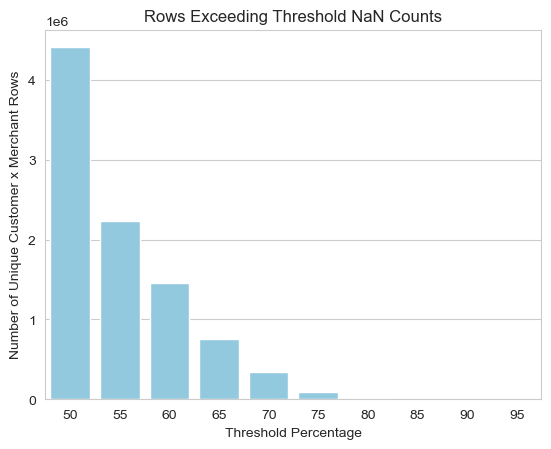

In [12]:
# Plot histogram counts of rows where NaN counts exceed thresholds
num_cols = train_data.shape[1]
# List of thresholds
thresholds = {
    50: np.ceil(num_cols*0.5),
    55: np.ceil(num_cols*0.5),
    60: np.ceil(num_cols*0.6),
    65: np.ceil(num_cols*0.5),
    70: np.ceil(num_cols*0.7),
    75: np.ceil(num_cols*0.5),
    80: np.ceil(num_cols*0.8),
    85: np.ceil(num_cols*0.5),
    90: np.ceil(num_cols*0.9),
    95: np.ceil(num_cols*0.5)
}

# Initialize dictionary to store counts exceeding each threshold
thresholded_counts = {threshold: 0 for threshold in thresholds}
# Iterate through each feature's NaN count
for index, row in row_nan_counts.iterrows():
    nan_count = row['NaN counts']

    # Calculate percentage of NaNs for the current feature
    nan_percentage = (nan_count / num_cols) * 100

    # Check if the nan_percentage exceeds any threshold
    for threshold, threshold_count in thresholds.items():
        if nan_percentage > threshold:
            thresholded_counts[threshold] += 1

# Convert dictionary to DataFrame for easier plotting with seaborn
thresholded_counts_df = pd.DataFrame({
    'Threshold': list(thresholded_counts.keys()),
    'Count': list(thresholded_counts.values())
})

# Plotting histogram using seaborn
sns.set_style("whitegrid")  # Set style to "whitegrid" for background grid lines
sns.barplot(x='Threshold', y='Count', data=thresholded_counts_df, color='skyblue')
plt.xlabel('Threshold Percentage')
plt.ylabel('Number of Unique Customer x Merchant Rows')
plt.title('Rows Exceeding Threshold NaN Counts')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# 3b. Drop Rows (DEPRECATED)

In [68]:
# Drop rows where NaN counts exceed selected threshold of 55%
filt_rows = train_data[(row_nan_counts["NaN counts"]/num_cols*100)<=55]
filt_rows.shape # 9,996,242 rows

# 4a. Check Column NaNs

In [12]:
# Count NaN values
col_nan_counts = train_data.isna().sum()
col_nan_counts = col_nan_counts.to_frame(name="NaN counts").reset_index()
col_nan_counts = col_nan_counts.rename(columns={"index": "Feature names"})
col_nan_counts.head(20)

,Feature names,NaN counts
0,customer,0
1,merchant,0
2,ind_recommended,0
3,activation,0
4,customer_profile_01,1695
5,customer_profile_02,1695
6,customer_profile_03,80754
7,customer_profile_04,4111
8,customer_spend_01,2047765
9,customer_spend_02,2047765


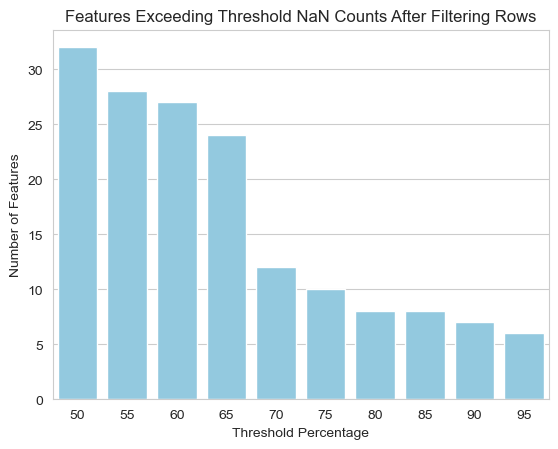

In [13]:
# Plot histogram counts of the columns where NaN counts are above thresholds
num_rows = train_data.shape[0]
# List of thresholds
thresholds = {
    50: np.ceil(num_rows*0.5),
    55: np.ceil(num_rows*0.5),
    60: np.ceil(num_rows*0.6),
    65: np.ceil(num_rows*0.5),
    70: np.ceil(num_rows*0.7),
    75: np.ceil(num_rows*0.5),
    80: np.ceil(num_rows*0.8),
    85: np.ceil(num_rows*0.5),
    90: np.ceil(num_rows*0.9),
    95: np.ceil(num_rows*0.5)
}
# Initialize dictionary to store counts exceeding each threshold
thresholded_counts = {threshold: 0 for threshold in thresholds}
# Iterate through each feature's NaN count
for index, row in col_nan_counts.iterrows():
    feature_name = row['Feature names']
    nan_count = row['NaN counts']

    # Calculate percentage of NaNs for the current feature
    nan_percentage = (nan_count / num_rows) * 100

    # Check if the nan_percentage exceeds any threshold
    for threshold, threshold_count in thresholds.items():
        if nan_percentage > threshold:
            thresholded_counts[threshold] += 1

# Convert dictionary to DataFrame for easier plotting with seaborn
thresholded_counts_df = pd.DataFrame({
    'Threshold': list(thresholded_counts.keys()),
    'Count': list(thresholded_counts.values())
})

# Plotting histogram using seaborn
sns.set_style("whitegrid")  # Set style to "whitegrid" for background grid lines
sns.barplot(x='Threshold', y='Count', data=thresholded_counts_df, color='skyblue')
plt.xlabel('Threshold Percentage')
plt.ylabel('Number of Features')
plt.title('Features Exceeding Threshold NaN Counts After Filtering Rows')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# 4b. Drop Columns

In [14]:
# Drop columns where NaN counts exceed selected threshold of 70%
filt_train_data = train_data.loc[:,list((col_nan_counts["NaN counts"]/num_rows*100)<=70)]
filt_train_data.shape # 59 columns

(12229978, 59)

# 5. Manual Analysis (After NaN Filtering)

In [29]:
# Reordered dataframe: by customer id
train_data_cmid = filt_train_data.sort_values(by=["customer"])

# Reordered dataframe: by merchant id
train_data_mrid = filt_train_data.sort_values(by=["merchant"])

In [30]:
train_data_cmid.head(60)

,customer,merchant,ind_recommended,activation,customer_profile_01,customer_profile_02,customer_profile_03,customer_profile_04,customer_spend_01,customer_spend_02,customer_spend_03,customer_spend_04,customer_spend_05,customer_spend_06,customer_spend_07,customer_spend_13,customer_spend_16,customer_spend_18,customer_spend_19,customer_digital_activity_01,customer_digital_activity_02,customer_digital_activity_03,customer_digital_activity_05,customer_digital_activity_06,customer_digital_activity_10,customer_digital_activity_11,customer_digital_activity_12,customer_digital_activity_13,customer_digital_activity_14,customer_digital_activity_15,customer_digital_activity_16,customer_digital_activity_17,customer_digital_activity_20,customer_digital_activity_21,customer_digital_activity_22,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_merchant_03,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10
4011268,0,437672,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,1.0,0.471619,34.730,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.987552,0.015306,0.004752,56.474309,50.0,17168.19,304.0,229.0,0.915199,1.000000,0.081735,1.0,1.000000,0.081735,101.0,0.389223,5809.0,83.857933,564.0,0.000000,0.0,0.0,2.0,54759.23,653.0,7789.0,73.640000
11762549,0,537916,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,1.0,0.339132,34.730,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069869,0.005304,0.000595,56.474309,50.0,17168.19,304.0,229.0,0.890552,1.000000,0.128216,1.0,1.000000,0.128216,101.0,0.559633,664.0,118.280882,671.0,0.000000,0.0,0.0,1.0,100538.75,850.0,3767.0,102.408519
5616754,0,294393,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,1.0,0.887291,34.730,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.474309,50.0,17168.19,304.0,229.0,0.842447,5.687500,0.181966,1.0,5.687500,0.181966,101.0,0.351039,9282.0,74.936134,173.0,0.000000,0.0,0.0,10.0,17834.80,238.0,28229.0,39.141591
2620353,0,552762,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,1.0,1.057874,34.730,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,0.037172,0.001231,56.474309,50.0,17168.19,304.0,229.0,0.883222,1.000000,0.191539,1.0,1.000000,0.191539,101.0,0.336029,10985.0,40.419133,256.0,22.948633,135.0,166.0,9.0,12125.74,300.0,40152.0,32.830000
12224583,0,525036,0,1,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,1.0,1.251532,34.730,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.474309,50.0,17168.19,304.0,229.0,0.911327,2.104167,0.091027,1.0,2.104167,0.091027,101.0,0.274652,22887.0,43.363227,481.0,17.202818,231.0,369.0,4.0,28619.73,660.0,53400.0,27.750000
5193924,0,490615,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,1.0,0.742947,34.730,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.474309,50.0,17168.19,304.0,229.0,0.891246,1.000000,0.134527,1.0,1.000000,0.134527,101.0,0.361008,8216.0,58.252128,694.0,0.472020,6.0,9.0,3.0,53650.21,921.0,19633.0,46.746250
11062022,0,155114,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,1.0,0.453883,34.730,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.474309,50.0,17168.19,304.0,229.0,0.939700,4.961538,0.328659,1.0,4.961538,0.328659,101.0,0.388792,5857.0,86.216301,114.0,0.000000,0.0,0.0,7.0,12587.58,146.0,7212.0,76.517500
6234560,0,591318,0,0,1837.92,1728.77,99.714867,448.0,102.

In [109]:
train_data_mrid.drop(train_data_mrid.iloc[:, 4:40], axis=1).head(40)

,customer,merchant,ind_recommended,activation,customer_merchant_03,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10
244947,53344,0,0,0,NaN,NaN,2.865887,1.0,NaN,2.865887,101.0,NaN,NaN,117.865342,62.0,0.0,0.0,0.0,13.0,8604.17,73.0,NaN,NaN
8192800,434018,0,0,0,NaN,NaN,0.503180,4.0,NaN,2.012719,101.0,NaN,NaN,121.203333,63.0,0.0,0.0,0.0,11.0,9090.25,75.0,NaN,NaN
6377565,74103,0,0,0,NaN,NaN,NaN,NaN,NaN,4.526856,101.0,NaN,NaN,118.339718,60.0,0.0,0.0,0.0,13.0,8402.12,71.0,NaN,NaN
9542236,208282,0,0,0,NaN,NaN,2.012719,1.0,NaN,2.012719,101.0,NaN,NaN,105.593472,58.0,0.0,0.0,0.0,13.0,7602.73,72.0,NaN,NaN
11251501,96378,0,0,0,NaN,NaN,2.012719,1.0,NaN,2.012719,101.0,NaN,NaN,106.537971,54.0,0.0,0.0,0.0,13.0,7351.12,69.0,NaN,NaN
11323755,1005,0,0,0,NaN,NaN,2.636383,1.0,NaN,2.636383,101.0,NaN,NaN,119.802169,75.0,0.0,0.0,0.0,11.0,9943.58,83.0,NaN,NaN
7988215,21097,0,0,0,NaN,NaN,NaN,NaN,NaN,4.526856,101.0,NaN,NaN,103.413375,68.0,0.0,0.0,0.0,11.0,8273.07,80.0,NaN,NaN
11599166,444491,0,0,0,NaN,NaN,2.865887,1.0,NaN,2.865887,101.0,NaN,NaN,102.920000,53.0,0.0,0.0,0.0,13.0,6792.72,66.0,NaN,NaN
134908,143190,0,0,0,NaN,NaN,NaN,NaN,NaN,2.012719,101.0,NaN,NaN,110.701127,58.0,0.0,0.0,0.0,13.0,7859.78,71.0,NaN,NaN
6958504,273381,1,0,0,NaN,NaN,NaN,NaN,NaN,3.759386,406.0,NaN,NaN,24.152000,5.0,0.0,0.0,0.0,79.0,120.76,5.0,NaN,NaN


In [96]:
def checkColNaN(data, feature_name):
    return data[data[feature_name].isnull()][['customer', 'merchant', 'ind_recommended', 'activation', feature_name]]

def checkFeatureById(data, feature_name, id_type, id):
    return data[data[id_type]==id][['customer', 'merchant', 'ind_recommended', 'activation', feature_name]]

In [231]:
checkColNaN(train_data_cmid, 'customer_profile_03').head(30)

,customer,merchant,ind_recommended,activation,customer_profile_03
4599559,117,71358,0,0,NaN
5630057,117,157956,0,0,NaN
5386662,117,521657,0,0,NaN
6125481,117,411499,0,0,NaN
2927739,117,214513,0,0,NaN
3795435,117,231234,0,0,NaN
926321,117,413316,1,0,NaN
7991556,117,107706,0,0,NaN
9469825,117,153843,0,0,NaN
207077,117,106096,1,0,NaN


In [228]:
checkFeatureById(train_data_cmid, 'customer_profile_03', 'customer', 292).head(30)

,customer,merchant,ind_recommended,activation,customer_profile_03
10601428,292,540049,0,0,NaN
3787285,292,274594,0,0,NaN
5078935,292,138148,0,0,NaN
9695695,292,100518,0,0,NaN
2838306,292,504898,0,0,NaN
717546,292,359022,0,0,NaN
4186101,292,367559,0,0,NaN
90681,292,522699,0,0,NaN
7343409,292,79184,1,0,NaN
6256325,292,11650,0,0,NaN


In [ ]:
checkColNaN(train_data_mrid, 'distance_05').head(30)

In [202]:
checkFeatureById(train_data_mrid, 'distance_05', 'merchant', 100).head(30)

,customer,merchant,ind_recommended,activation,distance_05
3840502,69729,100,0,0,20.455816
1991205,290264,100,0,0,2.317146
8558267,282658,100,0,0,4.333541
11913240,23901,100,0,0,9.204765
8266737,115416,100,0,0,13.023126
1714721,66878,100,0,0,4.333541
2113770,406567,100,0,0,1.274724
6840973,461718,100,0,0,1.274724
4822749,97058,100,0,0,9.012497
2565797,82013,100,0,0,9.012497


# 6. NaN Imputation

In [15]:
# Impute NaNs column-wise
def impute_nan(df):
    # Impute NaNs in columns containing "distance" and "customer_merchant_03"
    # for column in df.columns:
    #     if "distance" in column or column == "customer_merchant_03":
    #         df[column].fillna(df[column].mean(), inplace=True)
    #         print(column)

    for column in df.columns:
        # Impute NaNs in columns containing "customer" and "merchant"
        if column in ["customer", "merchant", "ind_recommended", "activation"]:
            pass
        elif "distance" in column or column == "customer_merchant_03":
            df[column].fillna(df[column].mean(), inplace=True)
            print(column)
        elif "customer" in column:
            df[column] = df.groupby("customer", group_keys=False)[column].apply(lambda x: x.fillna(0) if x.isnull().all() else x.fillna(x.mean()))
            print(column)
        elif "merchant" in column:
            df[column] = df.groupby("merchant", group_keys=False)[column].apply(lambda x: x.fillna(0) if x.isnull().all() else x.fillna(x.mean()))
            print(column)

    return df

In [16]:
imputed_train_data = impute_nan(filt_train_data)

customer_profile_01
customer_profile_02
customer_profile_03
customer_profile_04
customer_spend_01
customer_spend_02
customer_spend_03
customer_spend_04
customer_spend_05
customer_spend_06
customer_spend_07
customer_spend_13
customer_spend_16
customer_spend_18
customer_spend_19
customer_digital_activity_01
customer_digital_activity_02
customer_digital_activity_03
customer_digital_activity_05
customer_digital_activity_06
customer_digital_activity_10
customer_digital_activity_11
customer_digital_activity_12
customer_digital_activity_13
customer_digital_activity_14
customer_digital_activity_15
customer_digital_activity_16
customer_digital_activity_17
customer_digital_activity_20
customer_digital_activity_21
customer_digital_activity_22
customer_industry_spend_01
customer_industry_spend_02
customer_industry_spend_03
customer_industry_spend_04
customer_industry_spend_05
customer_merchant_03
distance_01
distance_02
distance_03
distance_04
distance_05
merchant_profile_01
merchant_profile_02
me

In [241]:
imputed_train_data.head(20)

,customer,merchant,ind_recommended,activation,customer_profile_01,customer_profile_02,customer_profile_03,customer_profile_04,customer_spend_01,customer_spend_02,customer_spend_03,customer_spend_04,customer_spend_05,customer_spend_06,customer_spend_07,customer_spend_13,customer_spend_16,customer_spend_18,customer_spend_19,customer_digital_activity_01,customer_digital_activity_02,customer_digital_activity_03,customer_digital_activity_05,customer_digital_activity_06,customer_digital_activity_10,customer_digital_activity_11,customer_digital_activity_12,customer_digital_activity_13,customer_digital_activity_14,customer_digital_activity_15,customer_digital_activity_16,customer_digital_activity_17,customer_digital_activity_20,customer_digital_activity_21,customer_digital_activity_22,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_merchant_03,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10
0,168972,152285,0,0,5466.06,1700.00,58.434969,86.0,107.215862,14.0,133.0,4477.000000,29719.09,782.0,306.0,3.000000,1.000000,0.714531,20.850000,0.000000,32.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444444,0.017921,0.000468,26.686594,74.000000,3682.750000,138.000000,111.000000,0.905510,0.307692,1.219756,13.000000,4.000000,15.856826,101.0,0.157534,65923.0,29.781042,43.0,0.000000,0.0,0.0,32.0,1429.49,48.0,49466.0,29.180000
1,212404,39032,0,0,781.56,597.41,5.392089,125.0,35.552000,2.0,8.0,17577.000000,1051.40,52.0,43.0,1.000000,1.000000,0.871597,24.810000,0.419355,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641575,0.005845,0.000123,50.928261,3.000000,1171.350000,23.000000,17.000000,0.961583,3.808333,6.998555,1.000000,3.808333,6.998555,403.0,0.084416,7801.0,34.643313,97.0,0.000000,0.0,0.0,15.0,5646.86,163.0,3638.0,28.465000
2,225178,7439,0,0,1457.84,1200.00,33.780445,180.0,31.623103,11.0,62.0,49494.000000,4695.22,196.0,136.0,1.000000,2.000000,0.076536,32.260000,0.836364,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,48.837872,19.000000,2295.380000,47.000000,42.000000,0.327672,11.352941,0.129853,13.500000,30.822421,1.753009,406.0,0.240000,12868.0,1731.000000,2.0,1731.000000,2.0,2.0,8.0,3462.00,2.0,3912.0,421.500000
3,183948,485069,0,0,351.22,500.00,37.340085,134.0,112.277391,16.0,33.0,147211.000000,5190.94,167.0,112.0,10.285714,7.000000,0.173581,21.016154,0.952381,28.666667,0.0,1.0,4.0,20.0,19.0,19.0,13.0,19.0,7.0,3.0,0.0,0.786111,0.000000,0.000000,22.221440,4.250000,323.921250,14.125000,13.687500,0.769936,11.352941,1.948002,139.002695,2.000000,9.000063,326.0,0.187500,23553.0,54.800000,4.0,0.000000,0.0,0.0,62.0,274.00,5.0,28919.0,50.000000
4,210107,536004,1,0,831.67,99.00,77.794164,114.0,448.427273,5.0,8.0,45.000000,11713.96,33.0,28.0,7.750000,4.500000,0.275255,90.645000,0.754386,15.000000,0.0,1.0,2.0,15.0,15.0,15.0,7.0,15.0,4.0,3.0,10.0,0.801169,0.000000,0.000000,368.501048,5.500000,11415.282500,23.500000,19.750000,0.651198,11.352941,1.948002,139.002695,6.500000,1.767939,326.0,0.428571,308.0,166.000000,1.0,0.000000,0.0,0.0,74.0,166.00,1.0,1086.0,69.509000
5,227362,419583,0,0,1612.40,1451.73,73.403888,80.0,81.858000,9.0,72.0,85208.350000,7850.53,302.0,184.0,4.125000,3.333333,0.467583,29.358333,0.212766,1.166667,0.0,1.0,1.0,5.0,5.0,5.0,4.0,5.0,3.0,3.0,0.0,1.000000,0.000000,0.000408,46.676478,25.272727,2240.605455,58.772727,48.954545,0.733332,11.352941,1.948002,139.002695,1.000000,1.366169,307.0,0.200000,16692.0,208.414211,19.0,0.000000,0.0,0.0,14.0,3959.87,19.0,20952.0,147.700000
6,401342,343074,0,0,0.00,0.00,0.000000,193.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.581818,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [242]:
# Count NaN values
col_nan_counts = imputed_train_data.isna().sum()
col_nan_counts = col_nan_counts.to_frame(name="NaN counts").reset_index()
col_nan_counts = col_nan_counts.rename(columns={"index": "Feature names"})
col_nan_counts # NO MORE NAs

,Feature names,NaN counts
0,customer,0
1,merchant,0
2,ind_recommended,0
3,activation,0
4,customer_profile_01,0
5,customer_profile_02,0
6,customer_profile_03,0
7,customer_profile_04,0
8,customer_spend_01,0
9,customer_spend_02,0


In [18]:
%pip install pyarrow fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 44.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.9/684.9 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 48.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Save imputed data as csv
imputed_train_data.to_parquet("./preprocessed_data/imputed_train_data.parquet")

# Damian's Scribbles

In [36]:
nan_counts.to_csv("./preprocessed_data/NaN_counts.csv", index=False)

In [ ]:
# Preprocessing: NA values
# Q1: Does imputation make sense?
# Q2: Imputation of mean across the same customer or the same merchant?

# Distances

